## Imports iniciais

In [55]:
from machinevisiontoolbox import VideoFile, colorspace_convert, Kernel
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
from IPython.display import clear_output


## Criação da função que plota a posição do Husky

In [81]:
def plot_position(husky_contours):
    
    # Eixo X:
    xaxis = []

    # Eixo Y:
    yaxis = []
    
    # Contagem do frame
    
    frames = []
    
    frame_number = 0
    
    for cnt in husky_contours:
        
        frame_number = frame_number + 1
        frames.append(frame_number)
        
        # obtendo momento
        M = cv2.moments(cnt)

        # obtendo centroide do momento
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        
        xaxis.append(cx)
        yaxis.append(cy)

    plt.plot(frames, xaxis, label = "X do Husky")
    plt.plot(frames, yaxis, label = "Y do Husky")
    plt.legend()
    plt.show()

## Criação da função que plota a orientação do Husky

In [94]:
def plot_orientation(husky_contours):
    
    # Orientação:
    orientation = []
    
    # Contagem do frame
    
    frames = []
    
    frame_number = 0
    
    for cnt in husky_contours:
        
        frame_number = frame_number + 1
        frames.append(frame_number)
        
        # obtendo orientação da elipse equivalente
        (x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
        
        orientation.append(angle)

    plt.plot(frames, orientation, label = "Orientação do Husky")
    plt.legend()
    plt.show()

## Criação da função que plota o caminho realizado pelo Husky no plano da imagem

In [106]:
def plot_husky_path(husky_contours):

    # Path realizado pelo husky:
    husky_path = np.zeros((540, 960))
    
    for cnt in husky_contours:
        
        # obtendo momento
        M = cv2.moments(cnt)

        # obtendo centroide do momento
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        husky_path[cy][cx] = 1
        
    imgplot = plt.imshow(husky_path) # plotando a imagem de cada frame do vídeo
    plt.gray()
    plt.show()

## Criação da função que carrega o vídeo, detecta a Pose do husky e plota o contorno

In [107]:
def detect_husky_pose(filename, flag_plot, flag_record):
    husky_contours = []
    threshold = 170
    kernel_opening = np.ones((1, 5), np.uint8)
    kernel_closing = np.ones((40, 40), np.uint8)
    movie = VideoFile(filename)
    
    if (flag_record):
        video = cv2.VideoWriter(filename, fourcc, 60, (960, 540))
    
    for frame in movie:
        # convertendo para HSV e pegando apenas o valor de Hue, onde a caixa vermelha terá valor alto no range de 0-255
        hue = colorspace_convert(frame.rgb, 'rgb', 'hsv')[:, :, 0]
        
        # gerando uma imagem binária
        hue[hue < threshold] = 0
        hue[hue >= threshold] = 1
        
        # aplicando uma operação de opening, para remover ruído
        opening = cv2.morphologyEx(hue, cv2.MORPH_OPEN, kernel_opening)
        
        # aplicando uma operação de closing, para preencher os buracos na imagem
        closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_closing)
        
        # detectando os contornos da imagem
        contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #cv2.drawContours(frame.rgb, contours, -1, (0,255,0), 3)

        # flag de controle para só plotar 1x por frame
        flag_frame = False
        
        # iterando cada contorno para desenhar apenas aquele que atende aos critérios de circularidade
        # e tamanho da caixa do husky
        for cnt in contours:
            area = cv2.contourArea(cnt)
            perimeter = cv2.arcLength(cnt,True)
            circularity = 0
            if (perimeter > 0):
                circularity = 4 * np.pi * area / (perimeter * perimeter);
            if (flag_frame == False and circularity > 0.3 and area > 1200):
                cv2.drawContours(frame.rgb, [cnt], -1, (0,255,0), 3)
                husky_contours.append(cnt)
                flag_frame = True
        
        if (flag_record):
            video.write(frame.rgb) # adicionando o frame a um arquivo de vídeo
        if (flag_plot):
            imgplot = plt.imshow(frame.rgb) # plotando a imagem de cada frame do vídeo
            plt.show()
            clear_output(wait=True)
    if (flag_record):
        video.release() # terminando a gravação do vídeo
        
    plot_pose(husky_contours)
    plot_orientation(husky_contours)
    plot_husky_path(husky_contours)

## Execução do código para o vídeo 1

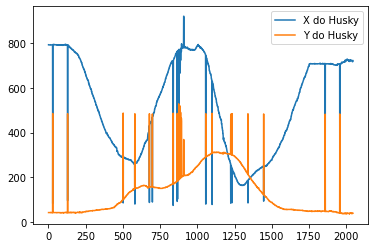

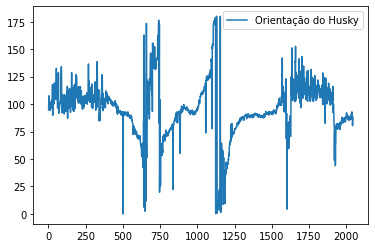

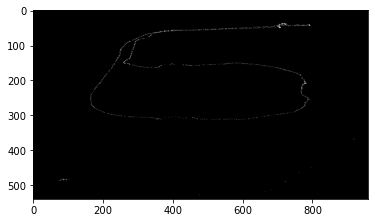

In [110]:
filename = 'video1_husky.mp4'
detect_husky_pose(filename, False, True) # gravando o vídeo e sem plotar durante a execução do programa

## Execução do código para o vídeo 2

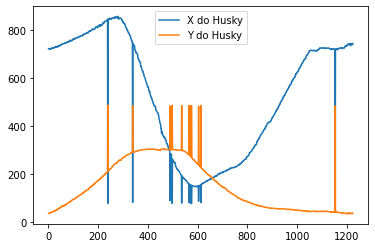

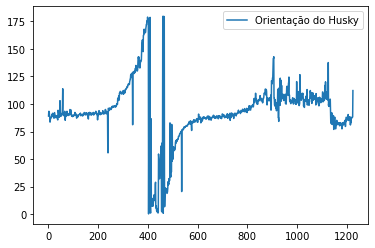

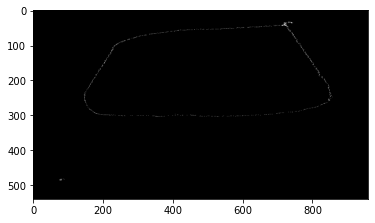

In [111]:
filename = 'Video2_husky.mp4'
detect_husky_pose(filename, False, True) # gravando o vídeo e sem plotar durante a execução do programa